In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("Mumbai.txt",index_col=0)

In [3]:
df

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

In [6]:
df.nunique()

Price                    979
Area                    1140
Location                 413
No. of Bedrooms            7
New/Resale                 2
Gymnasium                  2
Lift Available             2
Car Parking                2
Maintenance Staff          2
24x7 Security              2
Children's Play Area       2
Clubhouse                  2
Intercom                   2
Landscaped Gardens         2
Indoor Games               2
Gas Connection             2
Jogging Track              2
Swimming Pool              2
dtype: int64

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("-"*35)

8500000     116
9000000      93
7500000      92
4500000      88
9500000      88
           ... 
52600000      1
5686000       1
7881000       1
2770000       1
2465000       1
Name: Price, Length: 979, dtype: int64
-----------------------------------
650     263
1050    146
600     141
1100    138
1000     98
       ... 
1487      1
1558      1
793       1
596       1
435       1
Name: Area, Length: 1140, dtype: int64
-----------------------------------
Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64
-----------------------------------
2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: No. of Bedrooms, dtype: int64
-----------------------------------
0    4178
1    2169
Name: New/Resale, dtype: in

In [8]:
df.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [10]:
num_var=df.columns
num_var=num_var.drop("Location")
num_var

Index(['Price', 'Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

### EDA

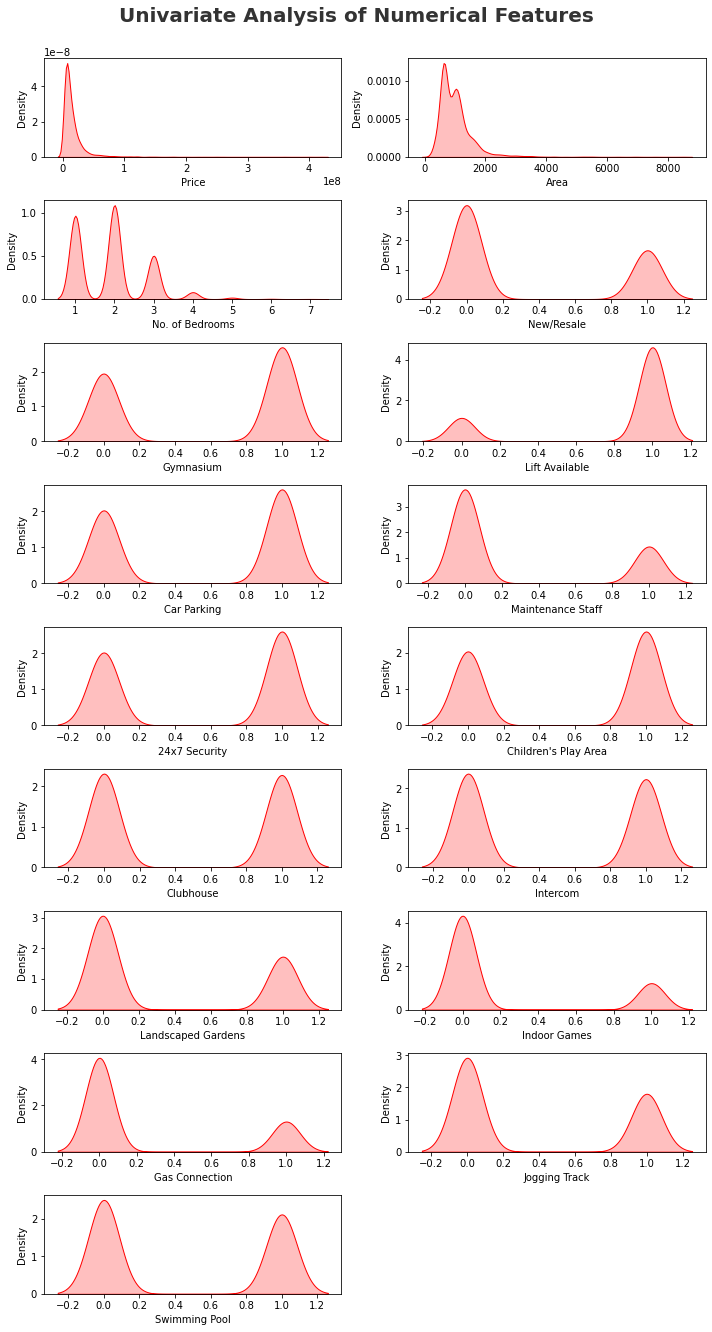

In [11]:

plt.figure(figsize=(10, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(10, 2, i+1)
    sns.kdeplot(x=df[num_var[i]],shade=True, color='r')
    plt.xlabel(num_var[i])
    plt.tight_layout()

### Observations:- 
* Area and Price is log normally distributed


In [12]:
num_var=df.columns
num_var=num_var.drop("Price")
num_var=num_var.drop("Location")
num_var

Index(['Area', 'No. of Bedrooms', 'New/Resale', 'Gymnasium', 'Lift Available',
       'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

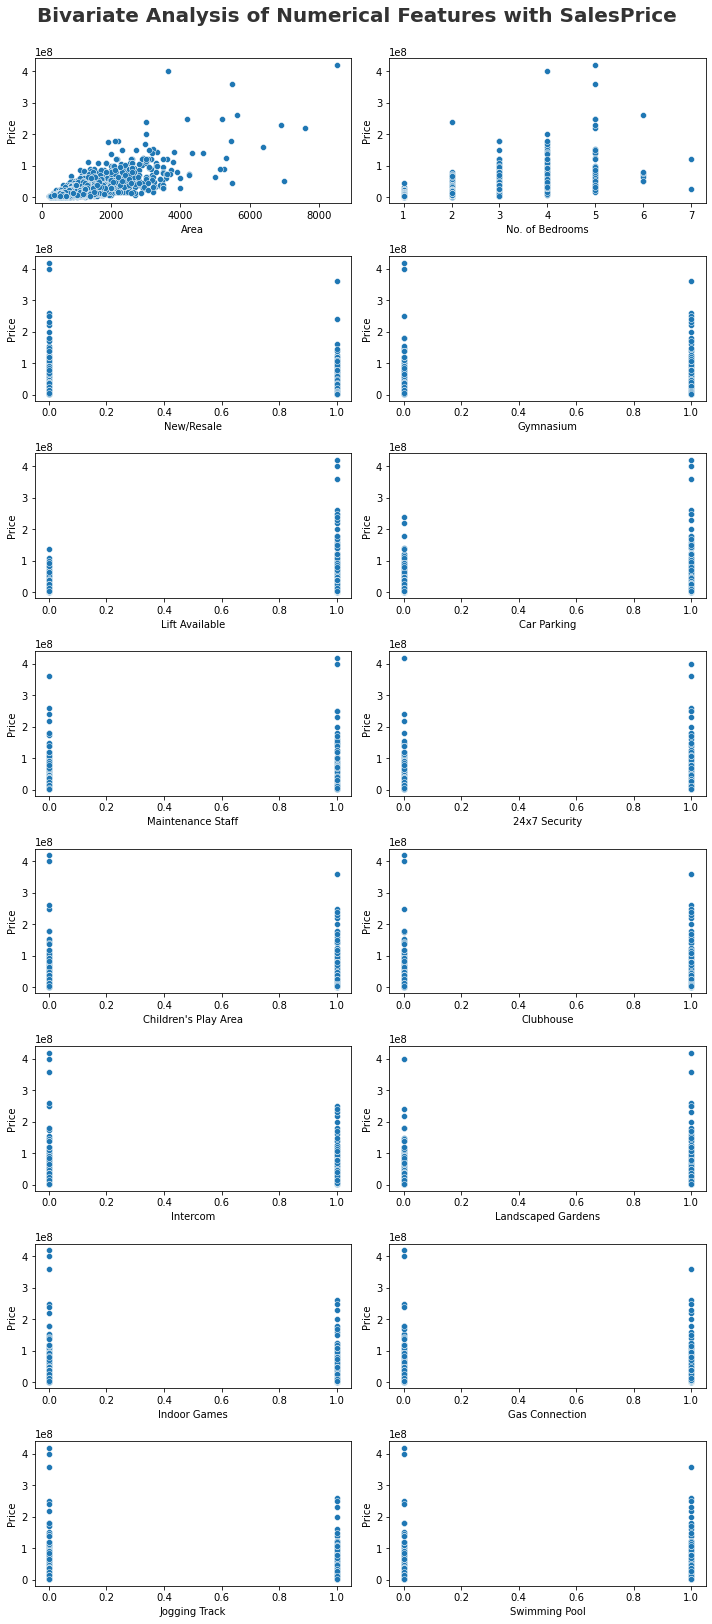

In [13]:
columns=num_var
plt.figure(figsize=(10, 55))
plt.suptitle('Bivariate Analysis of Numerical Features with SalesPrice', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(columns)):
    plt.subplot(20, 2, i+1)
    sns.scatterplot(x=df[columns[i]],y=df["Price"],palette="deep")
    plt.tight_layout()

#### Multivariate Analysis

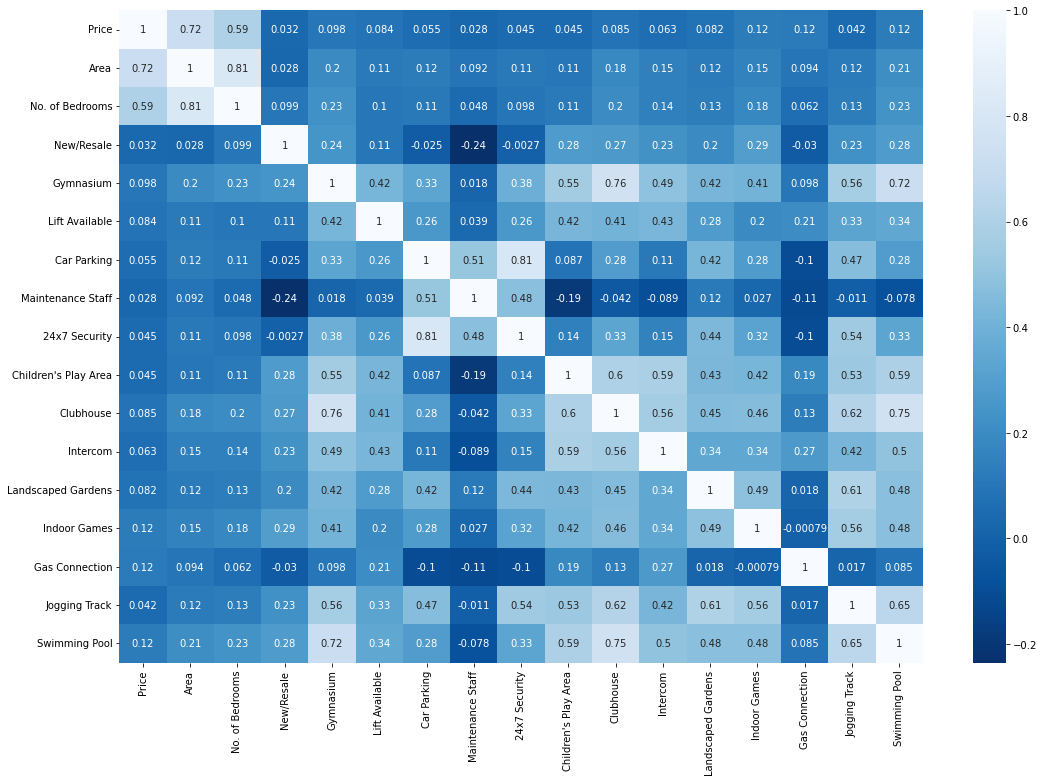

In [14]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.Blues_r)
plt.show()

#### Checking for outliers

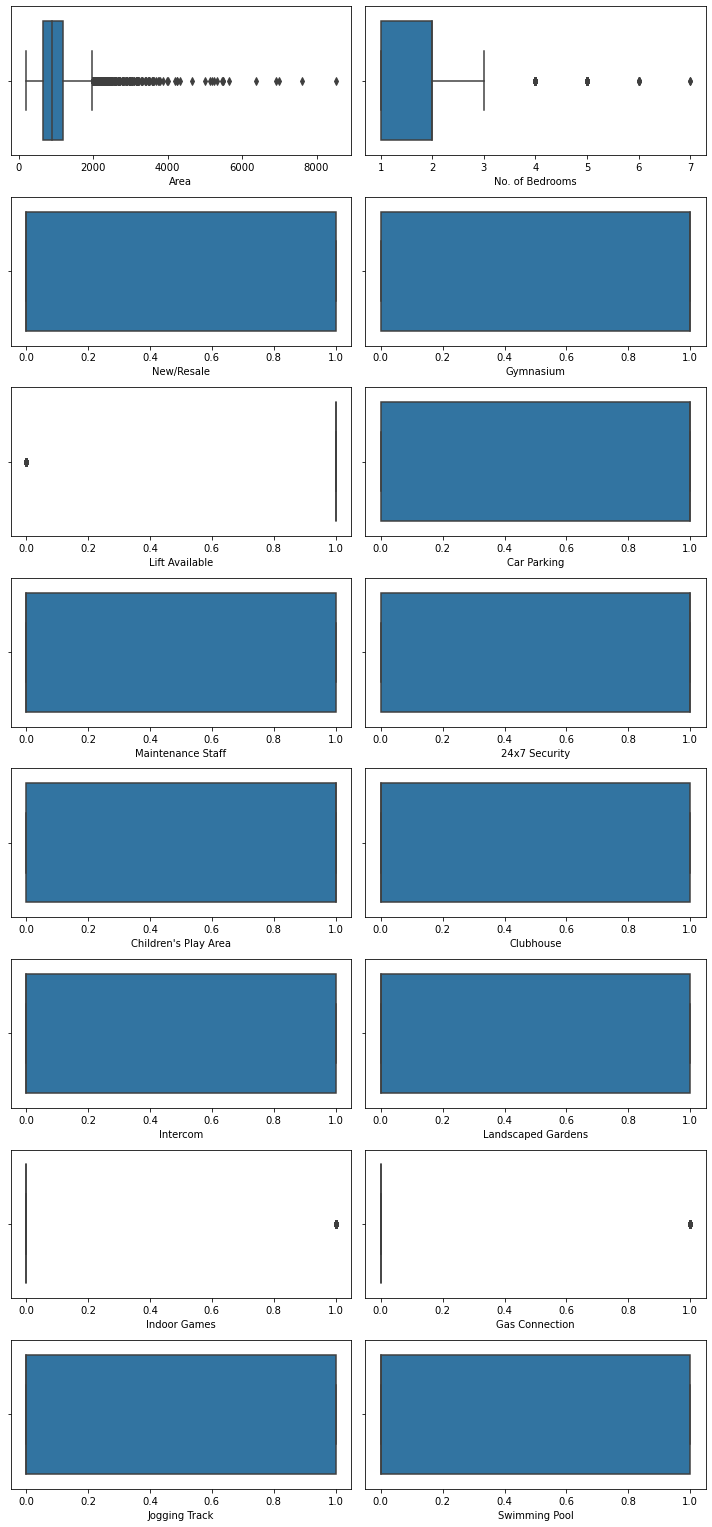

In [15]:
plt.figure(figsize=(10,50))
for i in range(len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.boxplot(df[num_var[i]])
    plt.tight_layout()

#### Checking the distribution of the data

In [16]:
def plot_data(df,feature):
    import scipy.stats as stat
    import pylab 
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.xlabel(feature)
    plt.show()

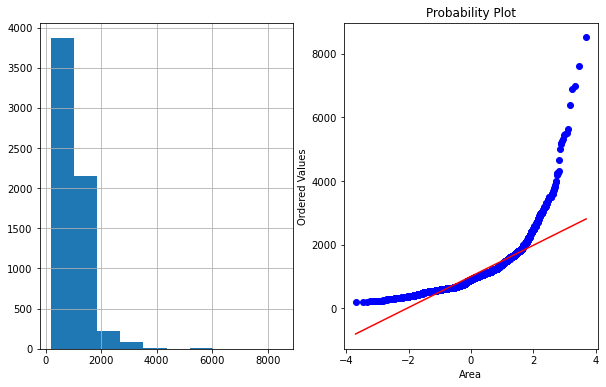

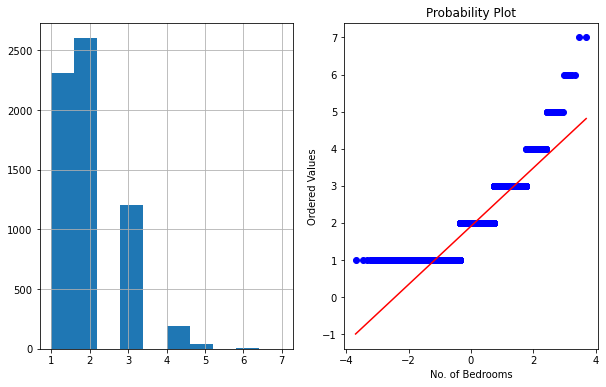

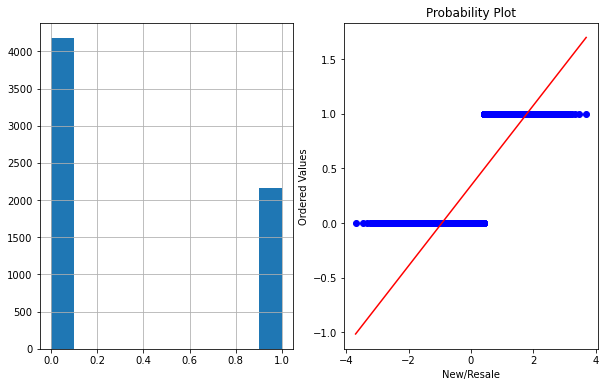

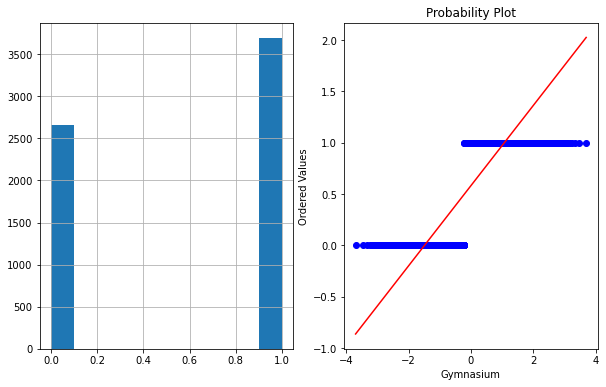

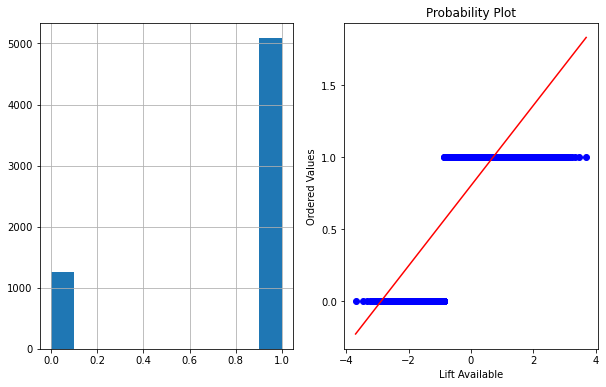

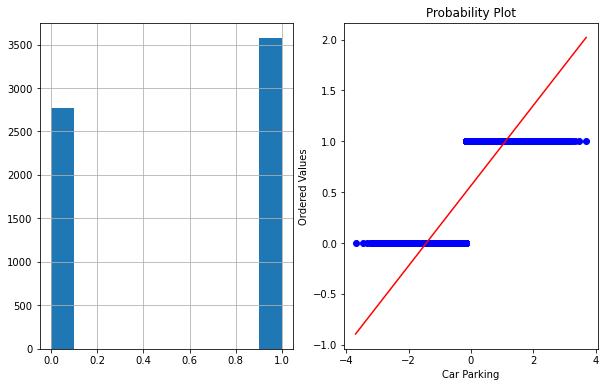

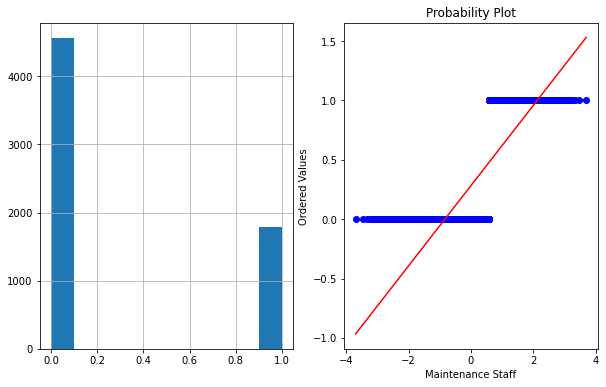

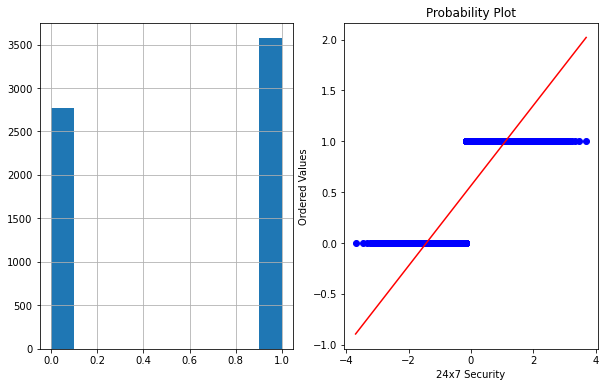

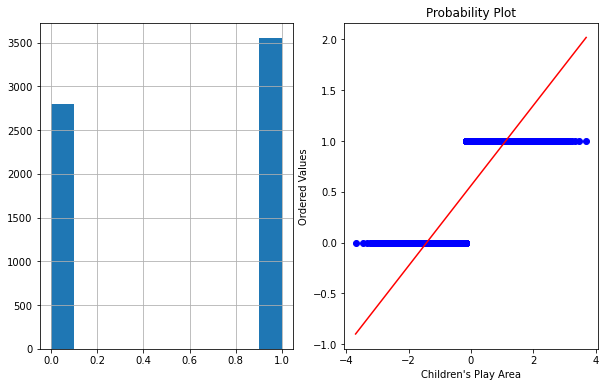

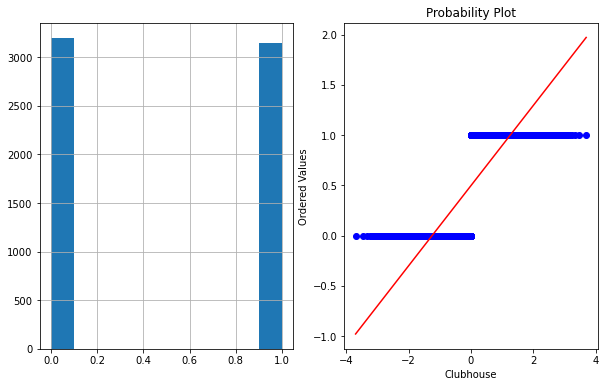

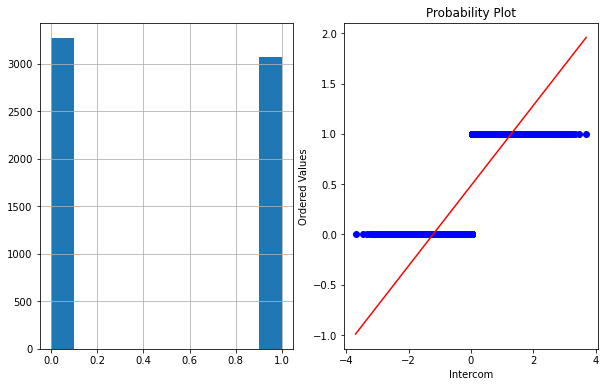

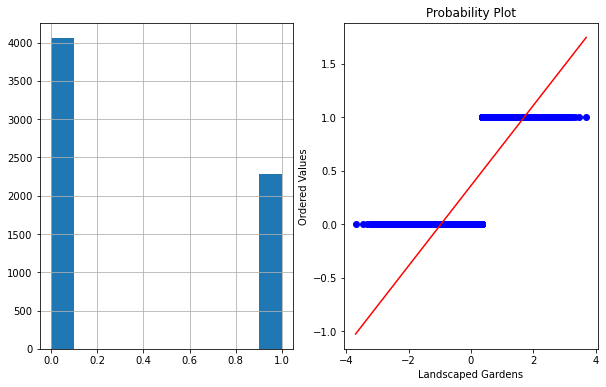

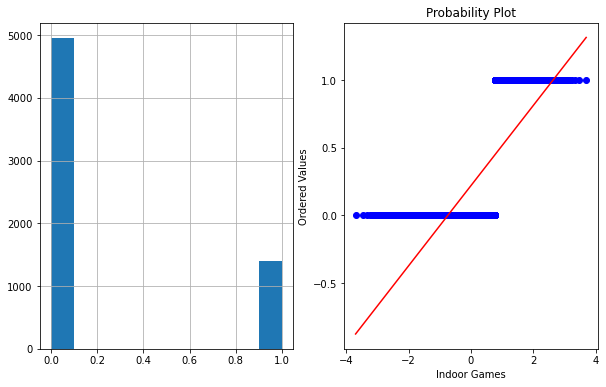

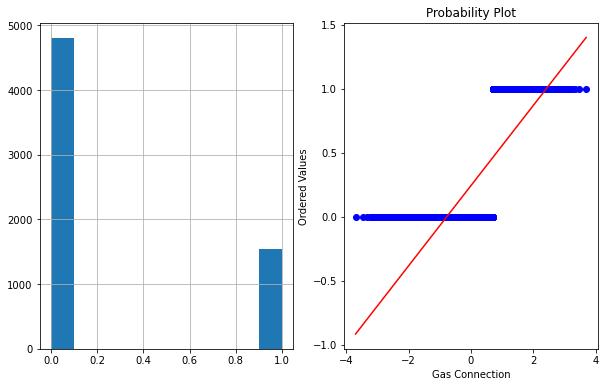

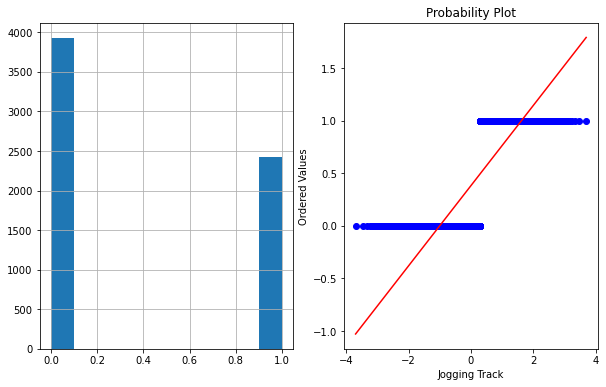

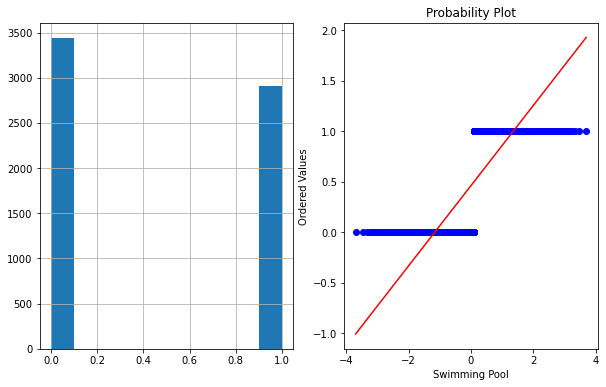

In [17]:
for i in num_var:
    plot_data(df,i)

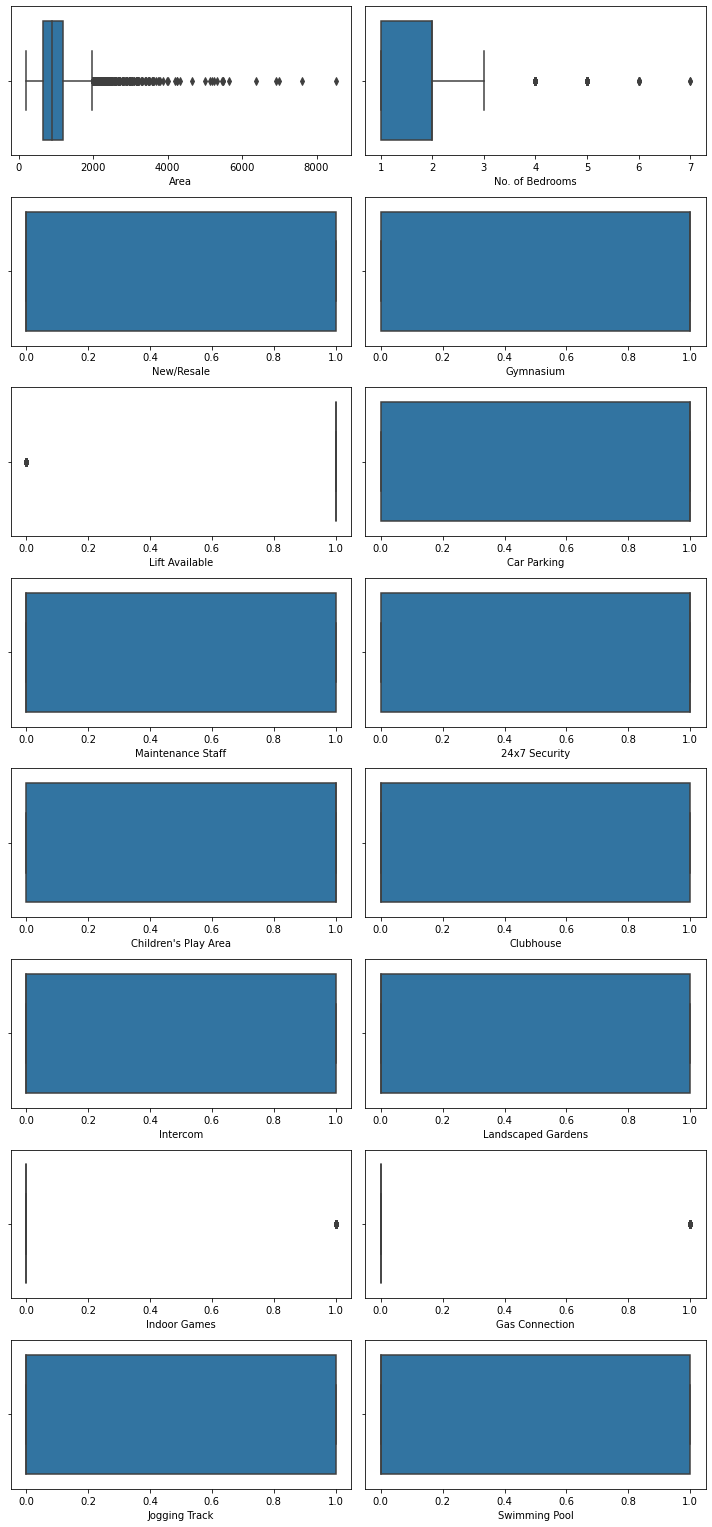

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(num_var)):
    plt.subplot(19, 2, i+1)
    sns.boxplot(df[num_var[i]])
    plt.tight_layout()

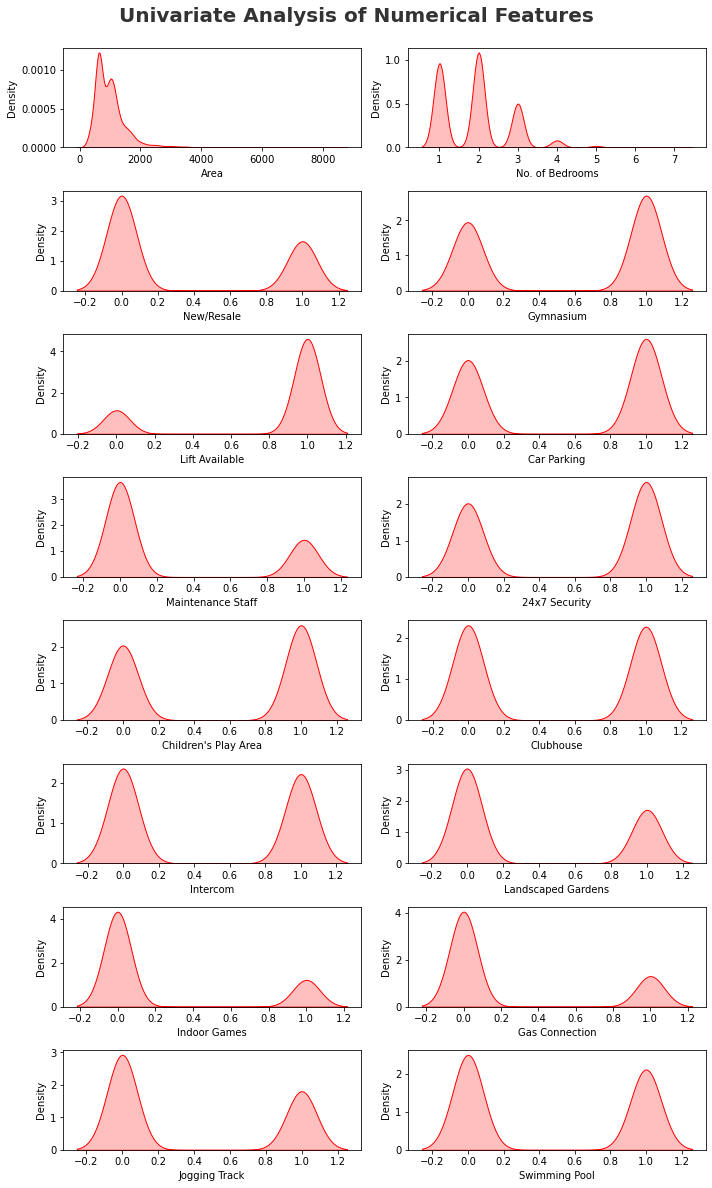

In [19]:
plt.figure(figsize=(10, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_var)):
    plt.subplot(10, 2, i+1)
    sns.kdeplot(x=df[num_var[i]],shade=True, color='r')
    plt.xlabel(num_var[i])
    plt.tight_layout()

In [20]:
df.describe()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# df["Price_per_area"]=df["Price"]/df["Area"]

In [22]:
df["Location"].value_counts()

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [23]:
cat_var=["Location"]

In [24]:
for feature in cat_var:
    temp=df.groupby(feature)['Price'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [25]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [26]:
for feature in cat_var:
    labels_ordered=df.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [27]:
df.head(10)

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,8,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,8,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,8,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,8,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,8,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
5,17000000,2000,8,4,0,1,1,1,1,1,1,1,1,1,0,0,1,1
6,12500000,1550,8,3,0,0,1,1,1,1,0,0,1,1,0,1,0,0
7,10500000,1370,15,3,0,0,1,1,1,1,0,0,1,0,0,0,0,0
8,10500000,1356,8,3,0,1,1,1,1,1,0,1,1,0,0,0,1,1
9,15000000,1680,8,3,0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [28]:
# Dependent and independent columns

In [29]:
X=df.drop(columns=["Price"])
y=df["Price"]

In [30]:
X.head()

,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,720,8,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,600,8,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,650,8,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,650,8,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,665,8,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [31]:
# X1=X.drop(columns=["Location"])

### Feature Selection

In [32]:
# Checking p value

In [33]:
# Checking the p value 
def ordinary_least_square(x,y):
    import statsmodels.api as sm
    x=sm.add_constant(x)
    model=sm.OLS(y,x).fit()
    print(model.summary())

In [34]:
ordinary_least_square(X,y)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     493.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:55:12   Log-Likelihood:            -1.1308e+05
No. Observations:                6347   AIC:                         2.262e+05
Df Residuals:                    6329   BIC:                         2.263e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.822e+07 

In [35]:
# Checking the VIF 
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [36]:
vif_score(X)

,Features,VIF_score
0,Area,3.020921
1,Location,1.092096
2,No. of Bedrooms,3.086312
3,New/Resale,1.233798
4,Gymnasium,2.889873
5,Lift Available,1.445098
6,Car Parking,3.233062
7,Maintenance Staff,1.738479
8,24x7 Security,3.438922
9,Children's Play Area,2.272415


In [37]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [38]:
def select(x_train, y_train):
    from sklearn.linear_model import Lasso, LassoCV
    from sklearn.feature_selection import SelectFromModel
    lassocv=LassoCV(alphas=[0.0001,0.001,0.002,0.003,0.004,0.005],cv=20,max_iter=100000)
    lassocv.fit(x_train,y_train)
    feature_select = SelectFromModel(Lasso(alpha=lassocv.alpha_, random_state=100))
    feature_select.fit(x_train, y_train)
    result = feature_select.get_support()
    selected_feature = x_train.columns[(result)]
    return selected_feature

            

In [39]:
select(X_train,y_train)

Index(['Area', 'Location', 'No. of Bedrooms', 'New/Resale', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [40]:
def variance_threshold(x_train):
    from sklearn.feature_selection import VarianceThreshold
    #It will remove all the zero variance features
    var_thresh=VarianceThreshold(threshold=0.25)
    var_thresh.fit(x_train)
    result=var_thresh.get_support()
    selected_feature=x_train.columns[(result)]
    return selected_feature

In [41]:
variance_threshold(X_train)

Index(['Area', 'Location', 'No. of Bedrooms'], dtype='object')

In [42]:
def correlation(x_train,threshold):
    colum_corr=set() #set of all names of correlated columns
    corr_matrix=x_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we want absolute coefficient values
                colum_name=corr_matrix.columns[i] #getting the names of column
                colum_corr.add(colum_name)
    return list(colum_corr)

In [43]:
correlation(X_train,0.81)

['No. of Bedrooms']

### Mutual Information (Entopy)

In [44]:
def information(x_train,y_train):
    """This function will give the relationship between Target and features.
    """
    from sklearn.feature_selection import mutual_info_regression
    mutual_info=mutual_info_regression(x_train,y_train)
    mutual_info=pd.Series(mutual_info, index=x_train.columns)
    return mutual_info.sort_values(ascending=False)

In [45]:
mutual=information(X_train,y_train)

<AxesSubplot:>

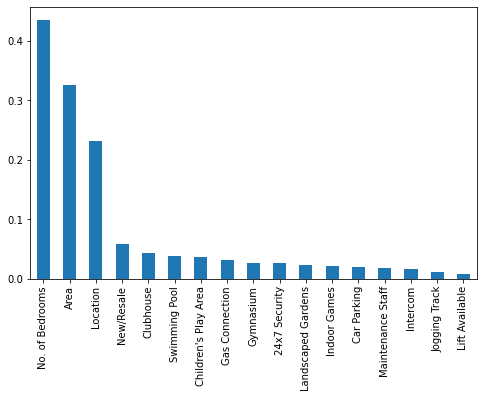

In [46]:
mutual.plot.bar(figsize=(8,5))

In [47]:
# Feature Impotance

In [48]:
def feature_importance(x_train,y_train):
    from sklearn.ensemble import ExtraTreesRegressor
    model=ExtraTreesRegressor()
    model.fit(x_train,y_train)
    result=pd.Series(model.feature_importances_,index=x_train.columns)
    return result.sort_values(ascending=False)

In [49]:
result=feature_importance(X_train,y_train)

<AxesSubplot:>

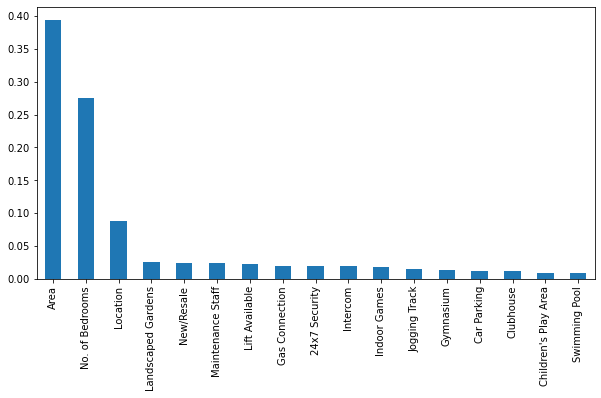

In [50]:
result.plot.bar(figsize=(10,5))

In [51]:
def chi2(x_train,y_train):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    order_rank_features=SelectKBest(score_func=chi2,k=5)
    order_rank=order_rank_features.fit(x_train,y_train)
    df1 = pd.DataFrame(order_rank.scores_)
    df2 = pd.DataFrame(X_train.columns)
    df3=pd.concat([df2,df1], axis=1)
    df3.columns=columns=["Features","Score"]
    df=df3.sort_values(by=["Score"],ascending=False).reset_index(drop=True)
    return df

In [52]:
chi2(X_train,y_train).head(10)

,Features,Score
0,Area,1.097720e+06
1,Location,4.541132e+03
2,No. of Bedrooms,1.230344e+03
3,Indoor Games,1.059193e+03
4,New/Resale,9.449926e+02
5,Gas Connection,7.011395e+02
6,Landscaped Gardens,6.582507e+02
7,Maintenance Staff,6.280224e+02
8,Swimming Pool,6.272039e+02
9,Jogging Track,6.187790e+02


In [53]:
# We will select Area Location No_of_bedrooms and price_per_are
# X=df[["Area","Location","No. of Bedrooms","New/Resale","Price_per_area","Price"]]

In [54]:
# X.head()

In [55]:
# X.describe()

In [56]:
# X.plot.box(figsize=(10,8))

In [57]:
# def remove_outliers(df):
#     # Finding the mean and standard deviation based on location
#     # Filtering the data which lies in 1st standard deviation and dropping others
#     # storing it in gen_df and concating that in df_output 
#     df_output=pd.DataFrame()
#     for key, subdf in df.groupby("Location"):
#         m=np.mean(subdf["Price_per_area"])
#         sd=np.std(subdf["Price_per_area"])
#         gen_df=subdf[(subdf["Price_per_area"] > (m-sd)) & (subdf["Price_per_area"] <= (m+sd))]
#         df_output=pd.concat([df_output,gen_df],ignore_index=True)
#     return df_output

In [58]:
# data = remove_outliers(X)

<AxesSubplot:>

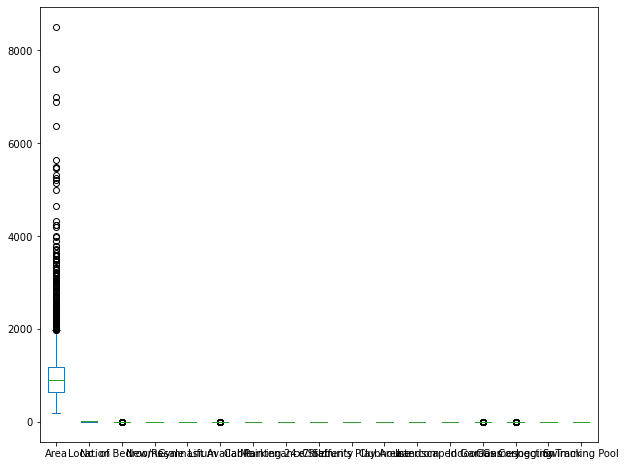

In [59]:
X.plot.box(figsize=(10,8))

In [60]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    median=df[column].median()
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence

In [61]:
# outliers_imputation_mild(X,"Area")

In [62]:
# outliers_imputation_mild(data,"Area")

<AxesSubplot:>

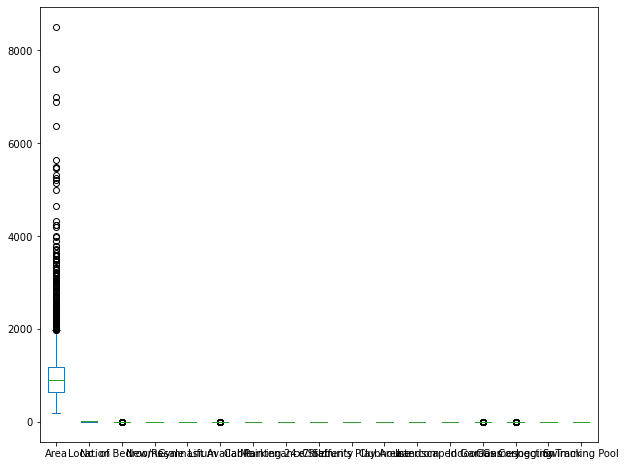

In [63]:
X.plot.box(figsize=(10,8))

In [64]:
# data.describe()

In [65]:
# # Removing area outliers
# def area_outlier_remove(df):
#     exclude_indices = np.array([])
#     for location, location_df in df_groupby('Location'):
#         area_stats={}
#         for area, area_df in location_df.groupby("Area"):
#             area_stats[area]={
#                 "mean" : np.mean(area_df["Price_per_area"]),
#                 "std" : np.std(area_df["Price_per_area"]),
#                 "count": area_df.shape[0]
#             }
#         for area, area_df in location_df.groupby("Area"):
#             stats=area_stats.get(area-1)
#             if stats and stats["count"]>5:
#                 exclude_indices = np.append(exclude_indices,area_df[area_df["Price_per_area"]<(stats["mean"])].index.values)
#     return df.drop(exclude_indices, axis="index")

In [66]:
# # We will select Area Location No_of_bedrooms and price_per_are
# y=X["Price"]
# X=X[["Area","Location","No. of Bedrooms","New/Resale"]]

In [92]:
X=df[["Area","Location","No. of Bedrooms","New/Resale"]]
y=df["Price"]

In [93]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=90)

In [94]:
# Model bulding

In [95]:
scale=StandardScaler()

In [96]:
lin_reg=LinearRegression()

In [97]:
pipe=make_pipeline(scale,lin_reg)

In [98]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [99]:
y_pread_lin=pipe.predict(X_test)

In [100]:
r2_score(y_test,y_pread_lin)

0.5428197283901902

In [101]:
# Applying Lasso

In [102]:
lassoc=LassoCV(alphas=np.linspace(0.001,10,30),cv=20)
lassoc.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-03, 3.45793103e-01, 6.90586207e-01, 1.03537931e+00,
       1.38017241e+00, 1.72496552e+00, 2.06975862e+00, 2.41455172e+00,
       2.75934483e+00, 3.10413793e+00, 3.44893103e+00, 3.79372414e+00,
       4.13851724e+00, 4.48331034e+00, 4.82810345e+00, 5.17289655e+00,
       5.51768966e+00, 5.86248276e+00, 6.20727586e+00, 6.55206897e+00,
       6.89686207e+00, 7.24165517e+00, 7.58644828e+00, 7.93124138e+00,
       8.27603448e+00, 8.62082759e+00, 8.96562069e+00, 9.31041379e+00,
       9.65520690e+00, 1.00000000e+01]),
        cv=20)

In [103]:
lassoc.alpha_

10.0

In [104]:
lasso=Lasso(alpha=lassoc.alpha_)

In [105]:
pipe2=make_pipeline(scale,lasso)

In [106]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10.0))])

In [107]:
y_pread_lasso=pipe2.predict(X_test)

In [108]:
r2_score(y_test,y_pread_lasso)

0.5428196197258692

In [109]:
# Applying Ridge
ridge=Ridge()

pipe3=make_pipeline(scale,ridge)

pipe3.fit(X_train,y_train)

y_pread_ridge=pipe3.predict(X_test)

r2_score(y_test,y_pread_ridge)

0.5428727148999

In [110]:
# Random forest regressor

In [111]:
rf=RandomForestRegressor()

In [112]:
pipe4=make_pipeline(scale,rf)

pipe4.fit(X_train,y_train)

y_pread_rf=pipe4.predict(X_test)

r2_score(y_test,y_pread_rf)

0.5441082943900889

In [113]:
def pikle_save(name,model):
    import pickle
    pickle.dump(model, open(f'{name}.pickle', 'wb'))

In [114]:
name="random_forest"
pikle_save(name,pipe4)

In [118]:
gbr=GradientBoostingRegressor()

In [119]:
pipe5=make_pipeline(scale,gbr)

pipe5.fit(X_train,y_train)

y_pread_gbr=pipe5.predict(X_test)

r2_score(y_test,y_pread_gbr)

0.5175324922565531